# Guided Project : Popular Data Science Questions

## Introduction

In this scenario, we're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

Our goal is to figure out what is the best content to write about. 

We decide to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content).

### Summary

Through the analysis of the questions posted on Data Science Stack Exchange (DSSE), we were able to spot the currently trendiest topics.

Data analysis coupled with our domain knowledge lead us to analyse in more depth the evolution of the ratio of Deep Learning related questions on this website over the last few years.

We were able to conclude that Deep Learning related contents are the ones that would interest readers the most and we strongly advocate for that proposal. 

## Stack Exchange

To get insights on the trendiest topics in the Data Science field, we turn ourselves to [Stack Exchange](https://stackexchange.com).

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science! For this project, we will focus on [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com).

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

### What kind of questions are welcome on this site?

On DSSE's help center's [section on question's](https://datascience.stackexchange.com/help/asking), we can read that we should:
- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:
- [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
- [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

### What, other than questions, does DSSE's home subdivide into?

On the [home page](https://datascience.stackexchange.com) we can see that we have four sections:
- [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked;
- [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions);
- [Users](https://datascience.stackexchange.com/users) — a list of users;
- [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

### What information is available in each post?

Looking at this [question](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1) (just as an example), some of the information we see is:

For both questions and answers:
- The posts's score;
- The posts's title;
- The posts's author;
- The posts's body;

For questions only:
- How many users have it on their "
- The last time the question as active;
- How many times the question was viewed;
- Related questions;
- The question's tags;

### Stack Exchange Data Explorer

After a spending some time investigating the website, we decide that the tags will be very useful in categorizing content, saving us the trouble of having to do it ourselves.

Now comes the challenge of accessing the data.

Stack Exchange provides a public database for each of its websites. Here's a link to query and explore Data Science Stack Exchange's database: [Link](https://data.stackexchange.com/datascience/query/new).

Perusing the database's table names, we spot a few that stand out as relevant for our goal:
- `Posts`
- `PostTags`
- `Tags`
- `TagSynonyms`

Running a few exploratory queries, leads us to focus our efforts on `posts` table. For examples, the `Tags` table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

The `posts` table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal.

- `ID`: An identification number for the post;
- `PostTypeID`: An identification number for the type of post;
- `CreationDate`: The date and time of creation of the post;
- `Score`: The post's score;
- `ViewCount`: How many times the post was viewed;
- `Tags`: What tags were used;
- `AnswerCount`: How many answers the question got (only applicable to question posts);
- `FavoriteCount`: How many times the question was favored (only applicable to question posts).

Note that with the exception of the tags column, the last few columns contain information about how popular the post is — the kind of information we're after.

There are eight different types of post in total. They are the following :

| PostTypeId | Name                |
|------------|---------------------|
| 1          | Question            |
| 2          | Answer              |
| 3          | Wiki                |
| 4          | TagWikiExcerpt      |
| 5          | TagWiki             |
| 6          | ModeratorNomination |
| 7          | WikiPlaceHolder     |
| 8          | PrivilegeWiki       |


Before we try to figure out which of them are relevant to us, let's check how many of them there are represented in the `posts` table. For that, we run the following commands in the database query editor:

``` mysql
SELECT PostTypeID, COUNT(*) as NrOfPosts
FROM posts
GROUP BY PostTypeId;
```

This query returns the following table:

| PostTypeId | NrOfPosts |
|------------|-----------|
| 1          | 21446     |
| 2          | 23673     |
| 4          | 236       |
| 5          | 236       |
| 6          | 11        |
| 7          | 1         |


Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. (At the time of writing it is early 2020).

## Getting the Data

To get the relevant data, we run the following query in the DSSE database query editor and download the output table as a CSV file.

``` mysql
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
 ```

## Exploring the Data

Let's start by importing the necessary libraries.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("white")

%matplotlib inline

We then read in the data, making sure `CreationData` is stored as a datetime object.

In [80]:
questions = pd.read_csv("2019_questions.csv",parse_dates=["CreationDate"])

We display the first rows of this dataframe to get more familiar with it.

In [81]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


And we then run the `info()` method on the questions dataframe to get more insights on the data.

In [82]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only the `FavoriteCount` column has missing values. A missing value on this column probably means that the question is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

Finally, the `Tags` column values are stored as objects. Since the object dtype is a catch-all type, let's see what types the objects in the `Tags` column are.

In [83]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags, so one way to deal with this column is to create five columns in questions called `Tag1`, `Tag2`, `Tag3`, `Tag4`, and `Tag5` and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

## Cleaning the data

We begin by fixing the `FavoriteCount` column.

In [84]:
questions["FavoriteCount"].fillna(value=0, axis=0, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

We then modify the `Tags` column to make it easier to work with.

In [85]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$","").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
8800,55265,2019-07-08 09:38:01,1,42,"[neural-network, deep-learning, keras, tensorf...",1,1
665,45368,2019-02-11 08:53:30,1,18,"[neural-network, convnet, text, transfer-learn...",0,0
3011,60213,2019-09-15 06:30:08,-1,24,"[deep-learning, image-classification, gpu, con...",1,0


## Most Popular Tags

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

We begin by counting how many times each tag was used.

In [86]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
# Conversion to dataframe for improved aesthetics
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns = {0: "Count"}, inplace=True)

tag_count.head(10)

,Count
scipy,40
transfer-learning,69
manhattan,3
clustering,257
image-classification,211
programming,7
image,32
hyperparameter,42
actor-critic,21
one-shot-learning,2


Let's now sort this dataframe by counts and visualize the top 20 results.

In [87]:
tag_count.sort_values(by="Count",ascending=True,inplace=True)
most_used = tag_count.tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


The threshold of 20 is somewhat arbitrary and we can experiment with others, however, popularity of the tags rapidly declines, so looking at these tags should be enough to help us with our goal. Let's visualize these data.

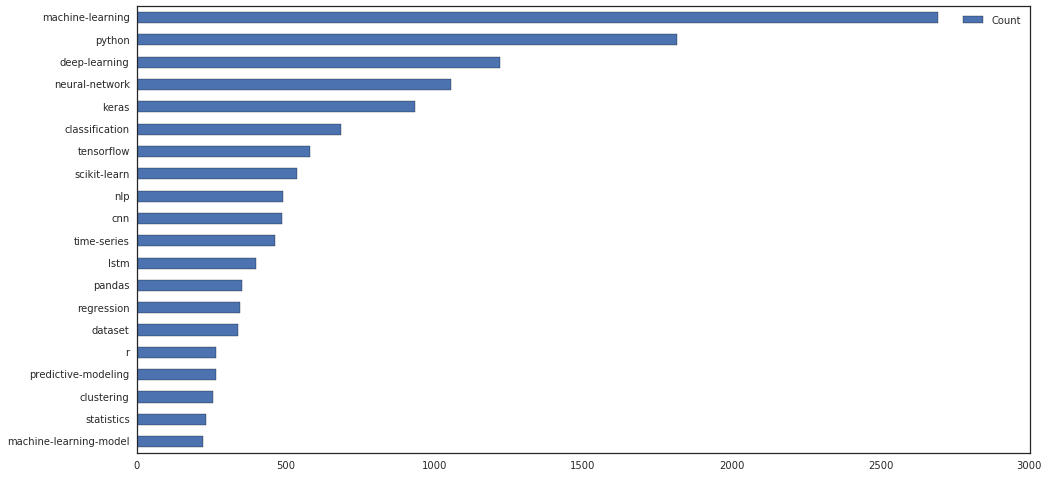

In [88]:
most_used.plot(kind='barh',figsize=(16,8))

Some tags are quite broad and are unlikely to be useful (e.g.: python, dataset, r). Before we investigate the tags a little deeper, let's repeat the same process for views. We want to know which are the most viewed tags. For that, we sum the number of views associated with each occurences of a tag.

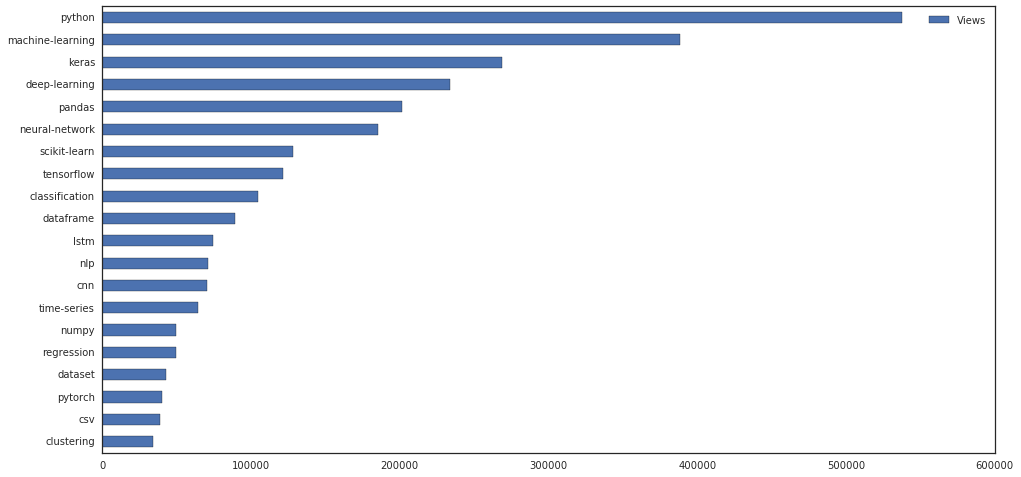

In [89]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_view_count:
            tag_view_count[tag] += row["ViewCount"]
        else:
            tag_view_count[tag] = row["ViewCount"]
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns = {0: "Views"}, inplace=True)
tag_view_count.sort_values(by="Views",ascending=True,inplace=True)
most_viewed = tag_view_count.tail(20)

most_viewed.plot(kind='barh',figsize=(16,8))

The most viewed tags are almost similar to the most used tags, though ranked in a slightly different order.

Let's plot both histograms side by side.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83cac2fe10>],
      dtype=object)

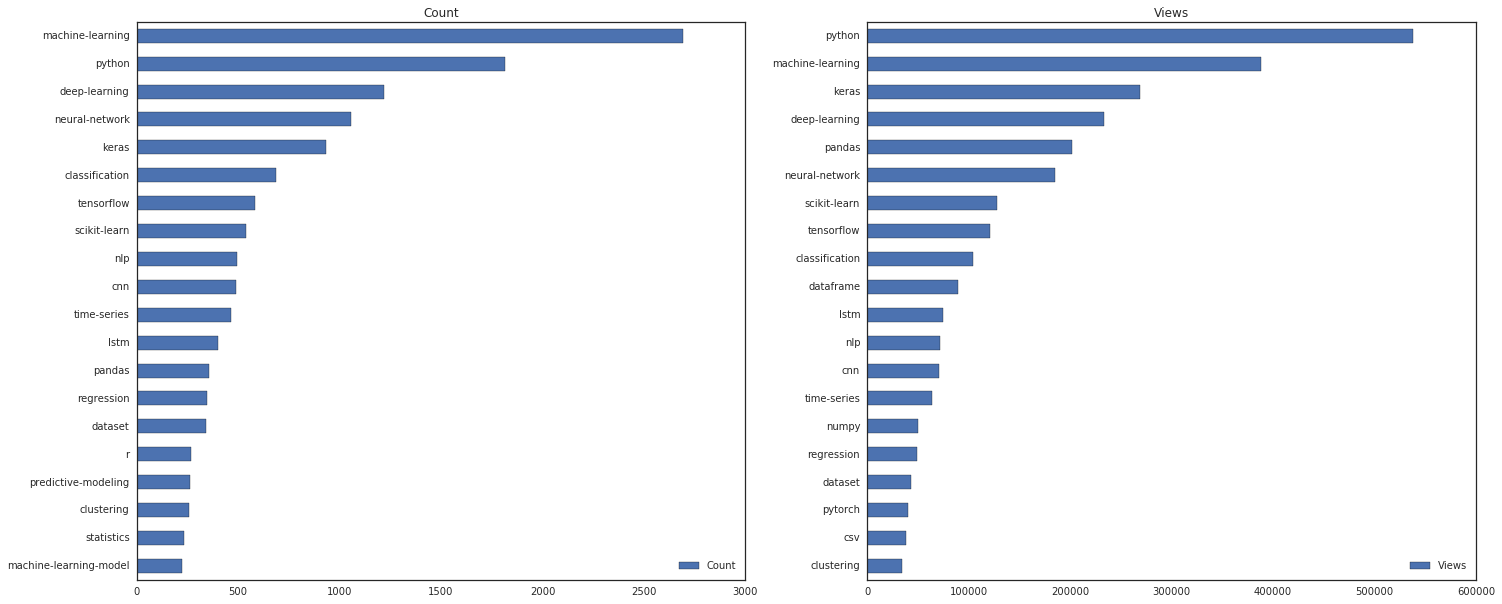

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches((24, 10))

most_used.plot(kind='barh', ax=axes[0], subplots=True)
most_viewed.plot(kind='barh', ax=axes[1], subplots=True)

Looking at the results, we see that most tags are present in both dataframes.

Let's now see what tags are in `most_used`, but not in `most_viewed`. We can identify them by the missing values in `ViewCount` below.

In [91]:
in_used = pd.merge(most_used, most_viewed, how='left', left_index=True, right_index=True)
in_used

,Count,Views
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


Similarly, let's see what tags are in most_viewed, but not in most_used.

In [92]:
in_viewed = pd.merge(most_used, most_viewed, how='right', left_index=True, right_index=True)
in_viewed

,Count,Views
clustering,257.0,33928
csv,NaN,38654
pytorch,NaN,40240
dataset,340.0,43151
regression,347.0,49451
numpy,NaN,49767
time-series,466.0,64134
cnn,489.0,70349
nlp,493.0,71382
lstm,402.0,74458


The tags present in `most_used` and not present in `most_viewed` are:
- `machine-learning-model`
- `statistics`
- `predictive-modeling`
- `r`

And the tags present in most_viewed but not in most_used are:
- `csv`
- `pytorch`
- `dataframe`

Some tags also stand out as being related. For example, `python` is related to `pandas` as Pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags.

In the next section, we gauge how pairs of tags are related to each other.

## Relation between tags

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

We begin by creating a list of all tags.

In [93]:
all_tags = list(tag_count.index)

We then create a dataframe where each row and column represents a tag of this list.

In [94]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)

# Printing a section of the association dataframe
associations.iloc[0:4,0:4]

,nl2sql,refit-model,pgm,google-cloud
nl2sql,NaN,NaN,NaN,NaN
refit-model,NaN,NaN,NaN,NaN
pgm,NaN,NaN,NaN,NaN
google-cloud,NaN,NaN,NaN,NaN


We now fill this dataframe with zeroes and then, for each lists of tags in the `Tags` columns, we increment the intervening tags by one. The end result will be a dataframe that tells us, for each pair of tags, how many times the two tags are used together.

In [95]:
associations.fillna(0,inplace=True)

for tags in questions['Tags']:
    associations.loc[tags,tags] += 1

The resulting dataframe is quite large. We decide to focus our attention on the most used tags only.

In [96]:
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


It's hard to understand what is going on in this dataframe. We create a heatmap for better visualization and interpretation of the results.

But before we do it, let's get rid of the extreme diagonal values (relation between a tag and itself), otherwise the colors will be too skewed.

In [97]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.nan

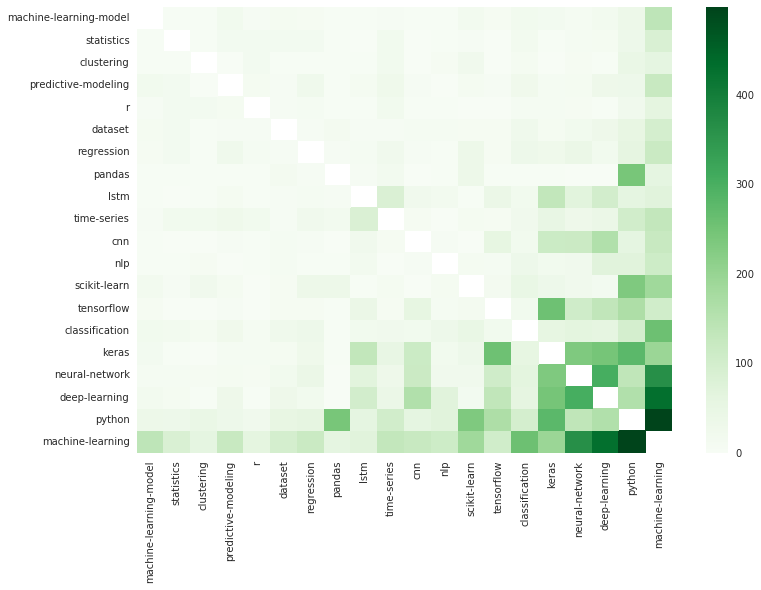

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap='Greens')

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

Attacking these problems would require powerful data mining techniques which are not part of this end of course project.

In the next section, we take a step back from analytical solutions to focus on domain knowledge.

## Enter Domain Knowledge

Although analytical solutions to the problem set forth exist, they aren't necessarily needed, nor the best way to go about solving the problem.

Domain knowledge can be very useful. Let's see how it can help us here.

Keras, scikit-learn and TensorFlow are all Python libraries that allow their users to employ deep learning.

Most of the top tags we observed in the previous section are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

But before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create should be the most useful for as long as possible. Could interest in deep learning be slowing down?

## Just a Fad?

To answer this question, we need to track the interest in deep learning across time. For that, we will:
- Count how many deep learning questions are asked per time period
- Count the total amount of questions per time period
- Calculate the ratio

We start by reading in the file "all_questions.csv" which holds the results of the query below:

``` mysql
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```

This query fetches all of the questions ever asked on DSSE, their dates and associated tags.

In [99]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

In [100]:
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [101]:
all_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


As done in the previous section, we transform the `Tags` column to make it easier to work with.

In [102]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$","").str.split("><")

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [103]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [104]:
all_q["DeepLearning"].sample(5)

5498     0
3359     1
14504    1
9189     0
3132     0
Name: DeepLearning, dtype: int64

The dataframe is now correctly formatted!

We now have to determine what time resolution would best fit our analysis.
The data-science-techonology landscape not being as dynamic to merit daily, weekly, or even monthly tracking we decide to track it quarterly.
Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [105]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

We then create a new column to identify the quarter of the year each question was asked.

In [106]:
def fetch_quarter(datetime):
    year = str(datetime.year)
    quarter = str((datetime.month - 1) // 3 + 1)
    return "{}Q{}".format(year, quarter)
    
all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter) 

In [107]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,2019Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,2019Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,2019Q1
3,45426,2019-02-12 04:51:49,[keras],1,2019Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,2019Q1


Finally we'll group by quarters and:
- Count the number of deep learning questions;
- Count the total number of questions;
- Compute the ratio between the two numbers above.

In [108]:
quarterly = all_q.groupby("Quarter").agg({'DeepLearning':["sum","size"]})
quarterly.columns = ["DeepLearningQuestions","TotalQuestions"]
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]/quarterly["TotalQuestions"]
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
17,2018Q3,685,1512,0.453042
21,2019Q3,941,2394,0.393066
7,2016Q1,110,516,0.213178
20,2019Q2,935,2393,0.390723
18,2018Q4,531,1294,0.410355


We plot the results for better visualization.

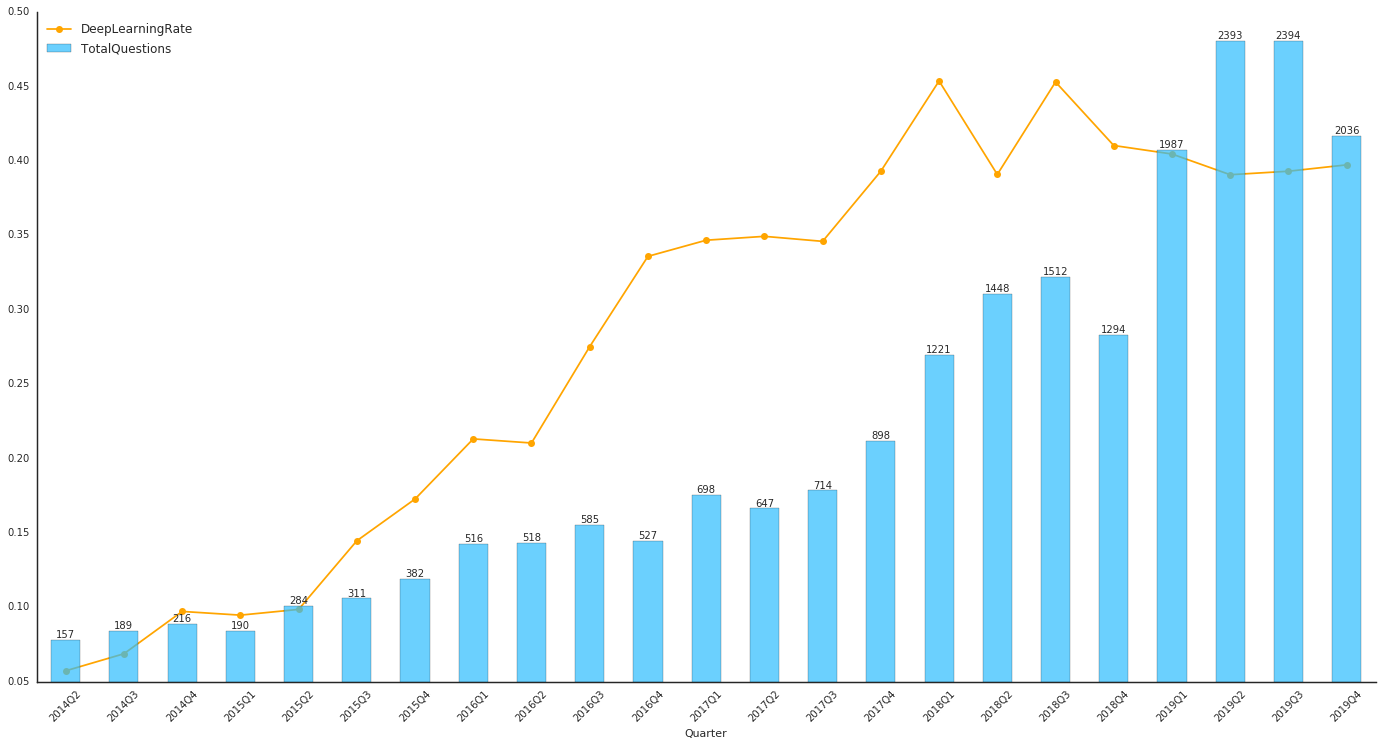

In [113]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, color='#2CBDFE', alpha=0.7, rot=45)

# Displaying the values of TotalQuestions above each bar
for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
    
xlims = ax1.get_xlim()

ax1.get_legend().remove()

# Re-formatting the legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})

# Hidding the right ticks and labels and the top and right spines
for ax in (ax1, ax2):
    ax.tick_params(right=False, labelright=False)
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        

It seems that deep learning questions was a high-growth trend since the start of DSSE in 2014 but it started plateauing from 2018.

The total number of questions asked on DSSE regardless of the field increased significantly over the last few years, almost following an exponential trend.

In 2019, questions on Deep Learning still represented 40% of the total number of questions, and no evidence suggests that it is decreasing. We thus decide to maintain our idea of proposing to create deep learning content.